### Linear Regression model for Duration of Eruption (min) and Waiting Time between Eruptions (min)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('truncated_waittimes.csv')
data.head()

,eruptionID,geyser,eruption_time_epoch,duration,observer,date,dur,waiting_min,waiting_hr,year
0,23132,Old Faithful,10506540,4min,OFVCL-EV,5/2/1970 14:29,4.00,71,1.18,1970
1,23133,Old Faithful,10510800,1.5min,OFVCL-EV,5/2/1970 15:40,1.50,50,0.83,1970
2,23134,Old Faithful,10513800,4.25m,OFVCL-EV,5/2/1970 16:30,4.25,67,1.12,1970
3,23135,Old Faithful,10517820,4m,OFVCL-EV,5/2/1970 17:37,4.00,81,1.35,1970
4,23136,Old Faithful,10522680,1.75min,OFVCL-EV,5/2/1970 18:58,1.75,43,0.72,1970


In [3]:
early = data.loc[data["year"]<= 1990]
early.count()

eruptionID             13521
geyser                 13521
eruption_time_epoch    13521
duration               13521
observer               13521
date                   13521
dur                    13521
waiting_min            13521
waiting_hr             13521
year                   13521
dtype: int64

In [4]:
late = data.loc[data["year"] >= 1999]
late.count()

eruptionID             218
geyser                 218
eruption_time_epoch    218
duration               218
observer               218
date                   218
dur                    218
waiting_min            218
waiting_hr             218
year                   218
dtype: int64

### Regression 1970 - 1990

In [5]:
# shape data
X = early["waiting_min"].values.reshape(-1, 1)
y = early["dur"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (13521, 1) (13521, 1)


Text(0,0.5,'Duration of Eruption Minutes')

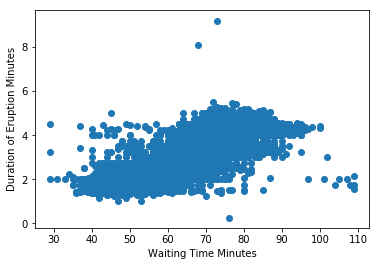

In [6]:
# Plot the data to see if linear relationship exists
plt.scatter(X, y)
plt.xlabel("Waiting Time Minutes")
plt.ylabel("Duration of Eruption Minutes")

In [7]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Calculate the mean_squared_error and the r-squared value
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.32790193965272385
R-squared (R2 ): 0.6904551068978646


In [12]:
# Call the `score` method on the model to show the r2 score
model.score(X_test, y_test)

0.6904551068978646

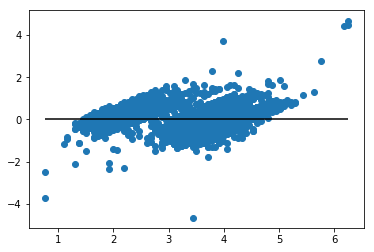

In [13]:
plt.scatter(predicted, predicted - y_test)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
plt.show()

In [14]:
X = late["waiting_min"]
y = late["dur"]

from scipy.stats import linregress
linregress(X,y) 

LinregressResult(slope=0.0375649714541293, intercept=0.10999313320529147, rvalue=0.5784795222305105, pvalue=7.21557852314979e-21, stderr=0.0036041014955822052)

### Regression 1999-2019

In [15]:
# shape data
X = late["waiting_min"].values.reshape(-1, 1)
y = late["dur"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (218, 1) (218, 1)


Text(0,0.5,'Duration of Eruption Minutes')

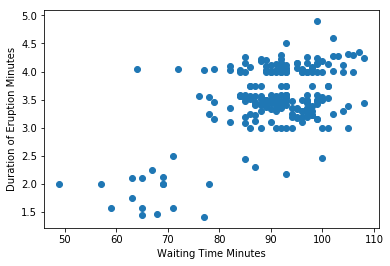

In [17]:
# Plot the data to see if linear relationship exists
plt.scatter(X, y)
plt.xlabel("Waiting Time Minutes")
plt.ylabel("Duration of Eruption Minutes")

In [18]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# Calculate the mean_squared_error and the r-squared value
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.2770651772839493
R-squared (R2 ): 0.42475248999610105


In [22]:
# Call the `score` method on the model to show the r2 score
model.score(X_test, y_test)

0.42475248999610105

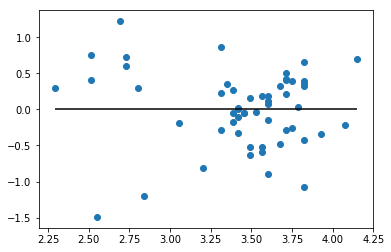

In [23]:
plt.scatter(predicted, predicted - y_test)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
plt.show()